In [14]:
import pandas as pd

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

Setting Style:

In [17]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.sans-serif'] = ['Arial']

Initial Data Loading and Inspection:

In [20]:
df_housing = pd.read_csv('city_market_tracker.tsv', sep='\t')

In [21]:
print(df_housing.head())

  PERIOD_BEGIN  PERIOD_END  PERIOD_DURATION REGION_TYPE  REGION_TYPE_ID  \
0   2015-10-01  2015-10-31               30       place               6   
1   2014-04-01  2014-04-30               30       place               6   
2   2017-10-01  2017-10-31               30       place               6   
3   2024-07-01  2024-07-31               30       place               6   
4   2022-01-01  2022-01-31               30       place               6   

   TABLE_ID  IS_SEASONALLY_ADJUSTED            REGION          CITY  \
0      8591                   False  Indian Trail, NC  Indian Trail   
1      8225                   False   Hainesville, IL   Hainesville   
2     10716                   False     Maysville, NC     Maysville   
3      3140                   False      Chewelah, WA      Chewelah   
4     11322                   False       Lombard, IL       Lombard   

            STATE  ... SOLD_ABOVE_LIST_YOY PRICE_DROPS  PRICE_DROPS_MOM  \
0  North Carolina  ...            0.038406    0

In [22]:
print(df_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818731 entries, 0 to 5818730
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   PERIOD_BEGIN                    object 
 1   PERIOD_END                      object 
 2   PERIOD_DURATION                 int64  
 3   REGION_TYPE                     object 
 4   REGION_TYPE_ID                  int64  
 5   TABLE_ID                        int64  
 6   IS_SEASONALLY_ADJUSTED          bool   
 7   REGION                          object 
 8   CITY                            object 
 9   STATE                           object 
 10  STATE_CODE                      object 
 11  PROPERTY_TYPE                   object 
 12  PROPERTY_TYPE_ID                int64  
 13  MEDIAN_SALE_PRICE               float64
 14  MEDIAN_SALE_PRICE_MOM           float64
 15  MEDIAN_SALE_PRICE_YOY           float64
 16  MEDIAN_LIST_PRICE               float64
 17  MEDIAN_LIST_PRICE_MOM      

Looking for missing values:

In [23]:
print(df_housing.isnull().sum())

PERIOD_BEGIN                            0
PERIOD_END                              0
PERIOD_DURATION                         0
REGION_TYPE                             0
REGION_TYPE_ID                          0
TABLE_ID                                0
IS_SEASONALLY_ADJUSTED                  0
REGION                                  0
CITY                                    0
STATE                                   0
STATE_CODE                              0
PROPERTY_TYPE                           0
PROPERTY_TYPE_ID                        0
MEDIAN_SALE_PRICE                    6582
MEDIAN_SALE_PRICE_MOM             1102021
MEDIAN_SALE_PRICE_YOY             1203523
MEDIAN_LIST_PRICE                  960301
MEDIAN_LIST_PRICE_MOM             1738535
MEDIAN_LIST_PRICE_YOY             1844692
MEDIAN_PPSF                         78734
MEDIAN_PPSF_MOM                   1164124
MEDIAN_PPSF_YOY                   1266240
MEDIAN_LIST_PPSF                   982804
MEDIAN_LIST_PPSF_MOM              

Converting to lowercase string for easier filtering:

In [24]:
df_housing['PARENT_METRO_REGION'] = df_housing['PARENT_METRO_REGION'].astype(str).str.lower()

In [25]:
df_housing['STATE'] = df_housing['STATE'].astype(str).str.lower()

Filtering Dataset for San Diego only:

In [30]:
df_san_diego = df_housing[(df_housing['PARENT_METRO_REGION'] == 'san diego, ca') & (df_housing['STATE'] == 'california')].copy()

Looking for missing values in the San Diego filtered data:

In [31]:
print(df_san_diego.isnull().sum())

PERIOD_BEGIN                         0
PERIOD_END                           0
PERIOD_DURATION                      0
REGION_TYPE                          0
REGION_TYPE_ID                       0
TABLE_ID                             0
IS_SEASONALLY_ADJUSTED               0
REGION                               0
CITY                                 0
STATE                                0
STATE_CODE                           0
PROPERTY_TYPE                        0
PROPERTY_TYPE_ID                     0
MEDIAN_SALE_PRICE                    0
MEDIAN_SALE_PRICE_MOM             2728
MEDIAN_SALE_PRICE_YOY             2695
MEDIAN_LIST_PRICE                 2260
MEDIAN_LIST_PRICE_MOM             4296
MEDIAN_LIST_PRICE_YOY             4383
MEDIAN_PPSF                        171
MEDIAN_PPSF_MOM                   2880
MEDIAN_PPSF_YOY                   2846
MEDIAN_LIST_PPSF                  2261
MEDIAN_LIST_PPSF_MOM              4297
MEDIAN_LIST_PPSF_YOY              4385
HOMES_SOLD               

Converting date columns to datetime objects:

In [32]:
df_san_diego['PERIOD_BEGIN'] = pd.to_datetime(df_san_diego['PERIOD_BEGIN'])

In [33]:
df_san_diego['PERIOD_END'] = pd.to_datetime(df_san_diego['PERIOD_END'])

In [34]:
df_san_diego['date'] = df_san_diego['PERIOD_END']

Sorting the dataframe by Property Type and the date to prep for forward filling:

In [35]:
df_san_diego = df_san_diego.sort_values(by=['PROPERTY_TYPE', 'date']).copy()

Defining columns that will be used:

In [36]:
columns_to_impute = [
    'MEDIAN_SALE_PRICE',
    'MEDIAN_SALE_PRICE_MOM',
    'MEDIAN_SALE_PRICE_YOY',
    'MEDIAN_LIST_PRICE',
    'MEDIAN_LIST_PRICE_MOM',
    'MEDIAN_LIST_PRICE_YOY',
    'MEDIAN_PPSF',
    'MEDIAN_PPSF_MOM',
    'MEDIAN_PPSF_YOY',
    'MEDIAN_LIST_PPSF',
    'MEDIAN_LIST_PPSF_MOM',
    'MEDIAN_LIST_PPSF_YOY',
    'HOMES_SOLD',
    'HOMES_SOLD_MOM',
    'HOMES_SOLD_YOY',
    'PENDING_SALES',
    'PENDING_SALES_MOM',
    'PENDING_SALES_YOY',
    'NEW_LISTINGS',
    'NEW_LISTINGS_MOM',
    'NEW_LISTINGS_YOY',
    'INVENTORY',
    'INVENTORY_MOM',
    'INVENTORY_YOY',
    'MONTHS_OF_SUPPLY',
    'MONTHS_OF_SUPPLY_MOM',
    'MONTHS_OF_SUPPLY_YOY',
    'MEDIAN_DOM',
    'MEDIAN_DOM_MOM',
    'MEDIAN_DOM_YOY',
    'AVG_SALE_TO_LIST',
    'AVG_SALE_TO_LIST_MOM',
    'AVG_SALE_TO_LIST_YOY',
    'SOLD_ABOVE_LIST',
    'SOLD_ABOVE_LIST_MOM',
    'SOLD_ABOVE_LIST_YOY',
    'PRICE_DROPS',
    'PRICE_DROPS_MOM',
    'PRICE_DROPS_YOY',
    'OFF_MARKET_IN_TWO_WEEKS',
    'OFF_MARKET_IN_TWO_WEEKS_MOM',
    'OFF_MARKET_IN_TWO_WEEKS_YOY'
]

In [37]:
for col in columns_to_impute:
    df_san_diego[col] = df_san_diego.groupby('PROPERTY_TYPE')[col].ffill()
    df_san_diego[col] = df_san_diego[col].fillna(df_san_diego[col].median())

Feature engineering (year, month, quarter):

In [38]:
df_san_diego['year'] = df_san_diego['date'].dt.year

In [39]:
df_san_diego['month'] = df_san_diego['date'].dt.month

In [40]:
df_san_diego['quarter'] = df_san_diego['date'].dt.quarter

Looking for missing values after above cleaning:

In [41]:
print(df_san_diego.isnull().sum())

PERIOD_BEGIN       0
PERIOD_END         0
PERIOD_DURATION    0
REGION_TYPE        0
REGION_TYPE_ID     0
                  ..
LAST_UPDATED       0
date               0
year               0
month              0
quarter            0
Length: 62, dtype: int64


Investigating question 1:

# --- 1. Analysis by Property Type: Price per Square Foot and Days on Market ---

Looking for unique property types:

In [42]:
unique_property_types = df_san_diego['PROPERTY_TYPE'].unique()

In [43]:
print(unique_property_types)

['All Residential' 'Condo/Co-op' 'Multi-Family (2-4 Unit)'
 'Single Family Residential' 'Townhouse']


Calculating average of the price per square foot and days on the market for each property type:

In [45]:
property_type_summary = df_san_diego.groupby('PROPERTY_TYPE').agg(Average_Median_PPSF=('MEDIAN_PPSF', 'mean'), Average_Median_DOM=('MEDIAN_DOM', 'mean')).reset_index()

Sorting the summary created above bs average PPSF in descending order (to help in visulization):

In [46]:
property_type_summary = property_type_summary.sort_values(by='Average_Median_PPSF', ascending=False)

Printing the property type summary to view key metrics:

In [47]:
print(property_type_summary)

               PROPERTY_TYPE  Average_Median_PPSF  Average_Median_DOM
2    Multi-Family (2-4 Unit)          1570.055096           64.603331
4                  Townhouse           398.742132           36.249010
3  Single Family Residential           396.425802           48.876628
1                Condo/Co-op           390.869439           40.936263
0            All Residential           382.524920           46.488036


NOTE: Multi-Family is clearly scewed - not going to include in my analysis.

In [48]:
property_type_summary = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].groupby('PROPERTY_TYPE').agg(Average_Median_PPSF=('MEDIAN_PPSF', 'mean'), Average_Median_DOM=('MEDIAN_DOM', 'mean')).reset_index()

Resorting after exluding multi-family:

In [50]:
property_type_summary = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].groupby('PROPERTY_TYPE').agg(
    Average_Median_PPSF=('MEDIAN_PPSF', 'mean'),
    Average_Median_DOM=('MEDIAN_DOM', 'mean')
).reset_index()

In [51]:
property_type_summary_ppsf = property_type_summary.sort_values(by='Average_Median_PPSF', ascending=False)

In [52]:
print(property_type_summary_ppsf)

               PROPERTY_TYPE  Average_Median_PPSF  Average_Median_DOM
3                  Townhouse           398.742132           36.249010
2  Single Family Residential           396.425802           48.876628
1                Condo/Co-op           390.869439           40.936263
0            All Residential           382.524920           46.488036


Creating visualization for Average Median Price Per Square Foot by Property Type:

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\3105724150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_PPSF', y='PROPERTY_TYPE', data=property_type_summary_ppsf, palette='viridis', edgecolor='black', linewidth=1)


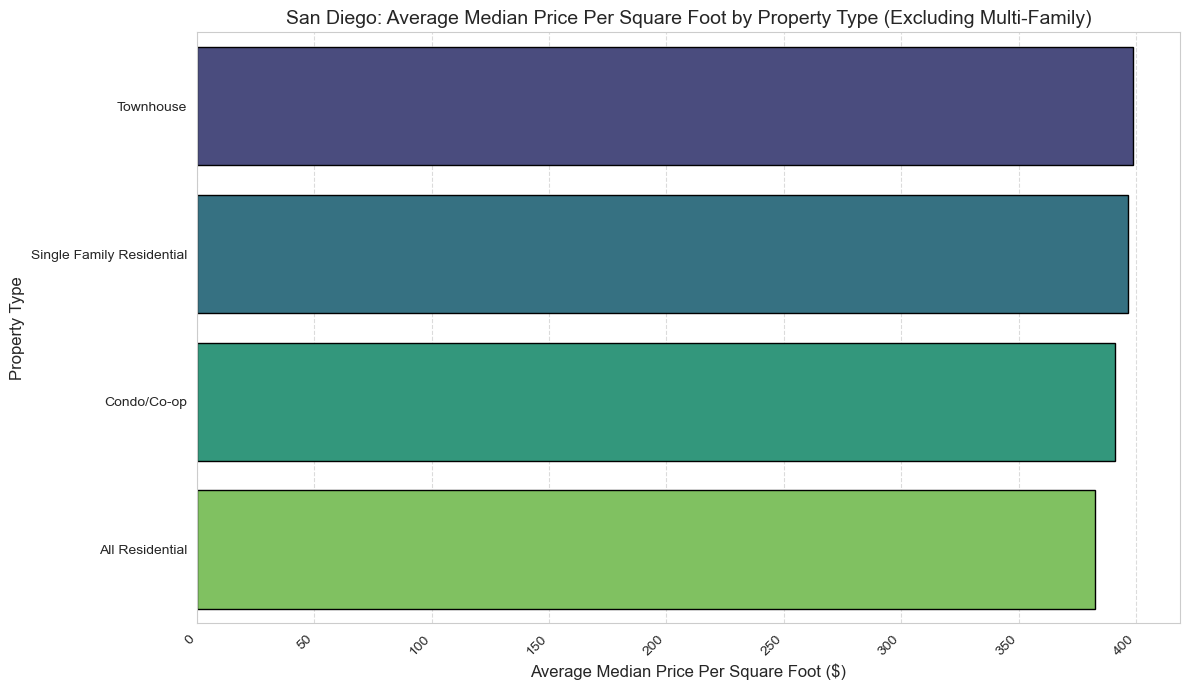

In [55]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Average_Median_PPSF', y='PROPERTY_TYPE', data=property_type_summary_ppsf, palette='viridis', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Price Per Square Foot ($)', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.title('San Diego: Average Median Price Per Square Foot by Property Type (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Sorting summary by average DOM and creating visualization for Average Median Days on Market by Property Type:

In [56]:
property_type_summary_dom = property_type_summary.sort_values(by='Average_Median_DOM', ascending=True)

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\621356976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_DOM', y='PROPERTY_TYPE', data=property_type_summary_dom, palette='magma', edgecolor='black', linewidth=1)


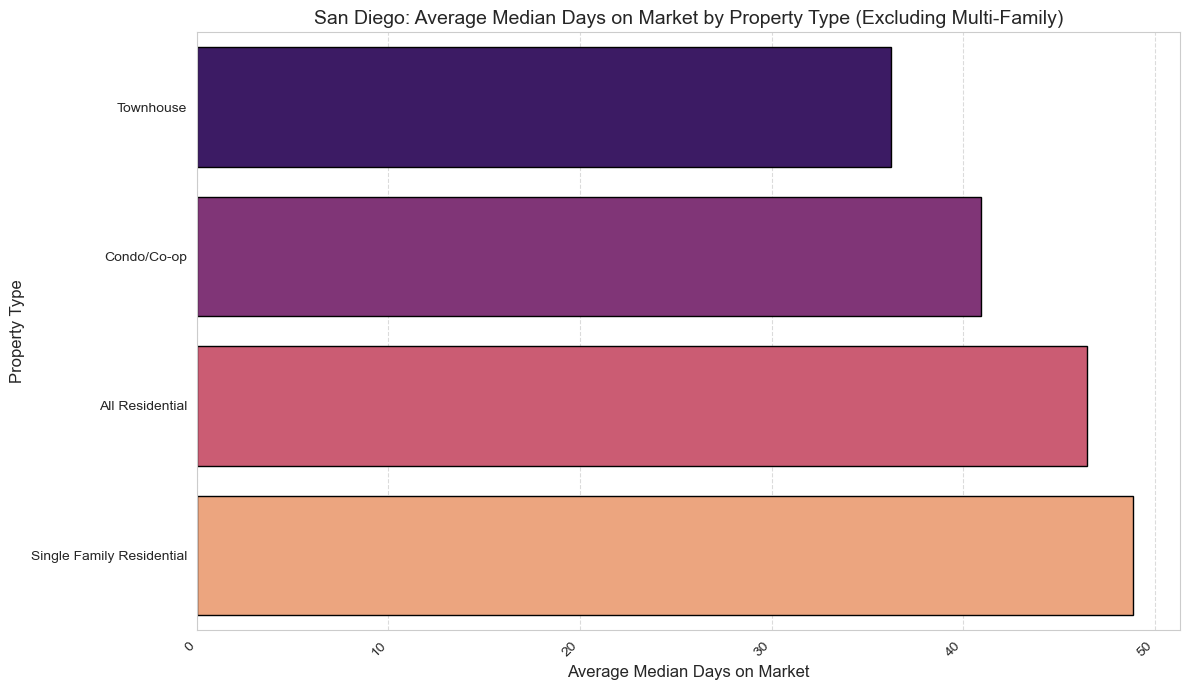

In [57]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Average_Median_DOM', y='PROPERTY_TYPE', data=property_type_summary_dom, palette='magma', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Days on Market', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.title('San Diego: Average Median Days on Market by Property Type (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()